In [11]:
# 📚 Import libraries
import pandas as pd

# 📂 Load dataset
data = pd.read_csv('student-mat.csv', sep=';')

# Check for missing values
data.isnull().sum()

# 👀 View the shape and first few rows
print("Shape:", data.shape)
data.head()



Shape: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
# 📊 Perform exploratory data analysis
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


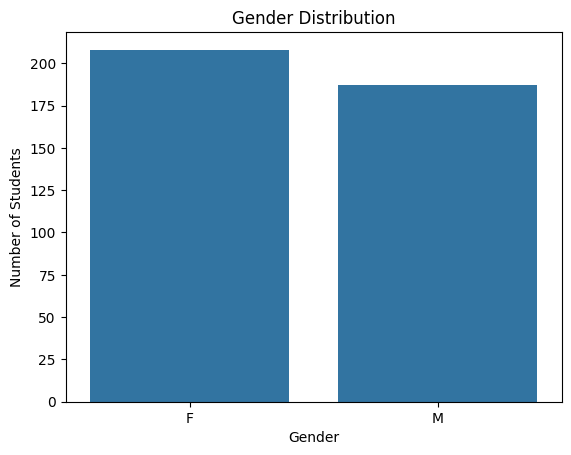

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()


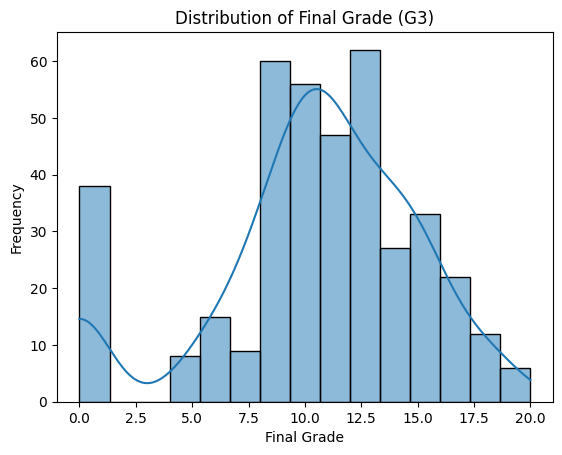

In [13]:
sns.histplot(data['G3'], bins=15, kde=True)
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()


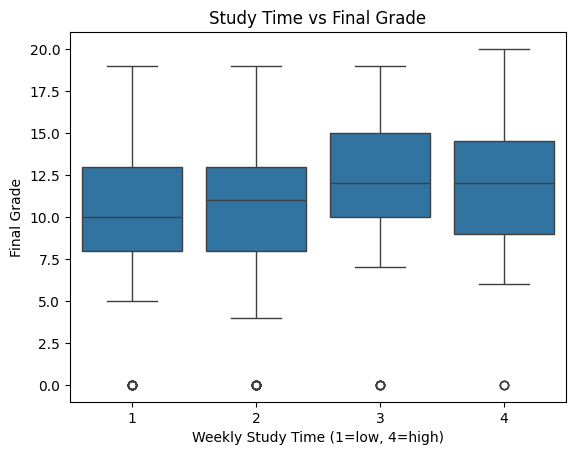

In [14]:
sns.boxplot(data=data, x='studytime', y='G3')
plt.title('Study Time vs Final Grade')
plt.xlabel('Weekly Study Time (1=low, 4=high)')
plt.ylabel('Final Grade')
plt.show()


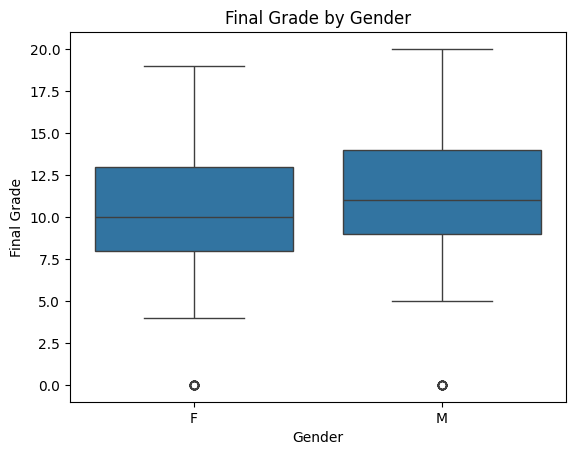

In [15]:
sns.boxplot(data=data, x='sex', y='G3')
plt.title('Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()


In [17]:
print('G3',data.shape)

G3 (395, 33)


In [23]:
# Create binary target: Pass=1, Fail=0
data['result'] = data['G3'].apply( lambda x: 'pass' if x >= 10 else 'fail')

# Check distribution of pass/fail
data['result'].value_counts()


result
pass    265
fail    130
Name: count, dtype: int64

In [24]:
features = ['sex', 'age', 'studytime', 'failures', 'absences', 'G1', 'G2']
X = data[features]
y = data['pass']


In [25]:
X['sex'] = X['sex'].map({'F': 0, 'M': 1})


C:\Users\SRK\AppData\Local\Temp\ipykernel_16140\3449255374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'F': 0, 'M': 1})


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2']

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8987341772151899

Classification Report:
               precision    recall  f1-score   support

        fail       0.83      0.89      0.86        27
        pass       0.94      0.90      0.92        52

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79


Confusion Matrix:
 [[24  3]
 [ 5 47]]
